In [1]:
import pandas as pd
from fbprophet import Prophet

INPUT_FILE = "bitcoin_daily_prices.csv"

df = pd.read_csv(INPUT_FILE, parse_dates=['date'], usecols=["date", "close"])
df.columns = ["y", "ds"]
df

,y,ds
0,7200.85,2020-01-01 05:30:00
1,6965.71,2020-01-02 05:30:00
2,7344.96,2020-01-03 05:30:00
3,7354.11,2020-01-04 05:30:00
4,7358.75,2020-01-05 05:30:00
...,...,...
685,60058.87,2021-11-16 05:30:00
686,60344.87,2021-11-17 05:30:00
687,56891.62,2021-11-18 05:30:00
688,58052.24,2021-11-19 05:30:00


In [2]:
# Initialize the prophet class
m = Prophet()

In [3]:
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = m.make_future_dataframe(periods=30)
future

,ds
0,2020-01-01 05:30:00
1,2020-01-02 05:30:00
2,2020-01-03 05:30:00
3,2020-01-04 05:30:00
4,2020-01-05 05:30:00
...,...
715,2021-12-16 05:30:00
716,2021-12-17 05:30:00
717,2021-12-18 05:30:00
718,2021-12-19 05:30:00


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
715,2021-12-16 05:30:00,69379.033719,65372.738386,73448.530256
716,2021-12-17 05:30:00,69740.121842,65240.866488,74022.880218
717,2021-12-18 05:30:00,69936.728300,65687.924808,74214.719907
718,2021-12-19 05:30:00,70146.159168,65854.365172,74040.569769
719,2021-12-20 05:30:00,70392.379557,66098.679670,74762.396315


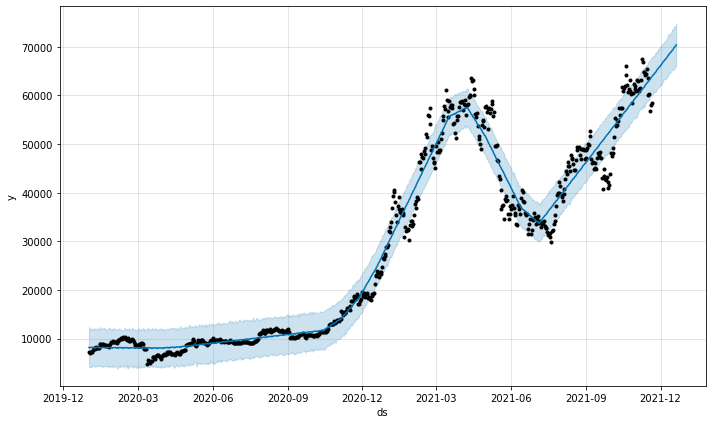

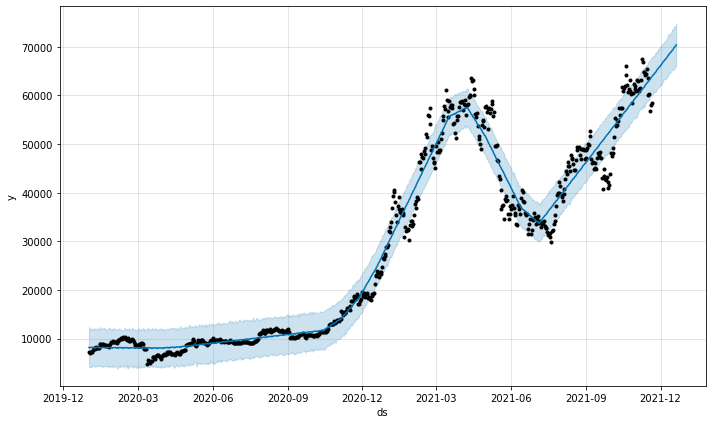

In [6]:
m.plot(forecast)

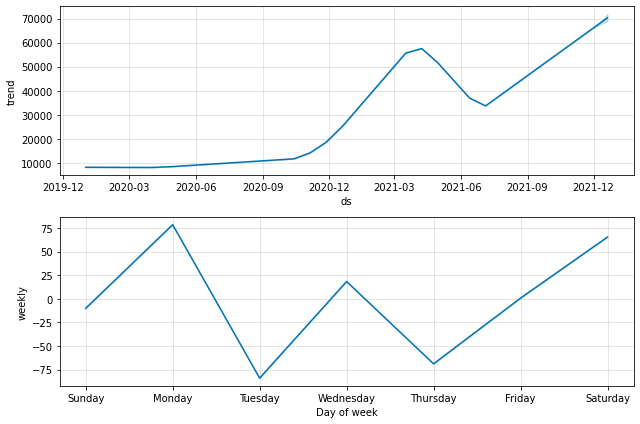

In [7]:
plot = m.plot_components(forecast)

## References:

* https://facebook.github.io/prophet/docs/quick_start.html
* https://otexts.com/fpp2/